In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('mtcars.csv')

In [3]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
df.columns=['car_name','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
df.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.shape

(32, 12)

In [6]:
df.dtypes

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object

In [16]:
cars_data=df.ix[:,(5,11)].values
cars_data_names=['drat','carb']
y=df.ix[:,9].values
y

C:\Users\jannett chabbeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\jannett chabbeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
#checking for independance between features
from scipy import stats
drat=df['drat']
carb=df['carb']
spearmanr_coefficient, p_value= stats.spearmanr(drat,carb)
print (spearmanr_coefficient)


-0.1252229399201802


In [24]:
#checking missing values
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
drat        0
wt          0
qsec        0
vs          0
am          0
gear        0
carb        0
dtype: int64

In [48]:
cars_data

array([[3.9 , 4.  ],
       [3.9 , 4.  ],
       [3.85, 1.  ],
       [3.08, 1.  ],
       [3.15, 2.  ],
       [2.76, 1.  ],
       [3.21, 4.  ],
       [3.69, 2.  ],
       [3.92, 2.  ],
       [3.92, 4.  ],
       [3.92, 4.  ],
       [3.07, 3.  ],
       [3.07, 3.  ],
       [3.07, 3.  ],
       [2.93, 4.  ],
       [3.  , 4.  ],
       [3.23, 4.  ],
       [4.08, 1.  ],
       [4.93, 2.  ],
       [4.22, 1.  ],
       [3.7 , 1.  ],
       [2.76, 2.  ],
       [3.15, 2.  ],
       [3.73, 4.  ],
       [3.08, 2.  ],
       [4.08, 1.  ],
       [4.43, 2.  ],
       [3.77, 2.  ],
       [4.22, 4.  ],
       [3.62, 6.  ],
       [3.54, 8.  ],
       [4.11, 2.  ]])

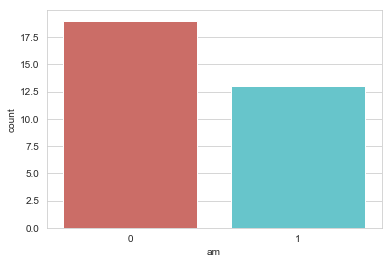

In [26]:
#checking that your target is binary or ordinary
import seaborn as sb
sb.set_style('whitegrid')
sb.countplot(x='am',data=df, palette='hls')

In [42]:
#check that your data is sufficient
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_name    32 non-null object
mpg         32 non-null float64
cyl         32 non-null int64
disp        32 non-null float64
hp          32 non-null int64
drat        32 non-null float64
wt          32 non-null float64
qsec        32 non-null float64
vs          32 non-null int64
am          32 non-null int64
gear        32 non-null int64
carb        32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [57]:
# split to train and test 
from sklearn.model_selection import train_test_split
y=df.ix[:,9].values
X_train, X_test, y_train, y_test = train_test_split(
  cars_data, y, test_size=0.33, random_state=42)

C:\Users\jannett chabbeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# Deploying and evalute the model:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

c:\users\jannett chabbeh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6363636363636364

In [61]:
y_pred= model.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.83      0.71         6\n           1       0.67      0.40      0.50         5\n\n    accuracy                           0.64        11\n   macro avg       0.65      0.62      0.61        11\nweighted avg       0.64      0.64      0.62        11\n'